In [3]:
#libraries
import tensorflow as tf
from tensorflow.keras import models, layers, datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
#train data shape
print("Training data shape:", x_train.shape)

Training data shape: (50000, 32, 32, 3)


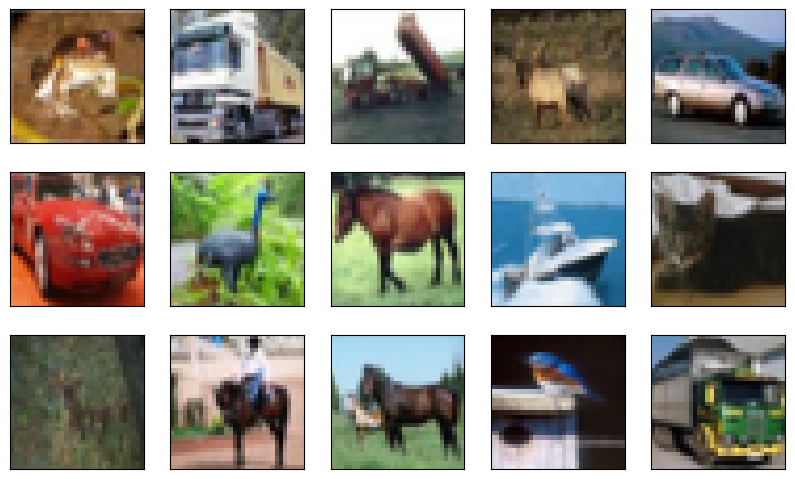

In [ ]:
#plot images
plt.figure(figsize=(10,6))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])

In [ ]:
#model building
model = models.Sequential([layers.Conv2D(32, (3, 3),activation='relu', input_shape=(32, 32, 3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#forward pass on a batch
batch = x_train[:4]
logits = model(batch, training = False)

print("Input batch shape:", batch.shape)
print("output logits shape:", logits.shape)
print("output logits:\n", logits.numpy())

Input batch shape: (4, 32, 32, 3)
output logits shape: (4, 10)
output logits:
 [[0.09132655 0.12662861 0.10589501 0.10712507 0.09791017 0.09805518
  0.08875222 0.09457775 0.09439401 0.09533537]
 [0.08953458 0.13145259 0.10673918 0.10546678 0.09991077 0.09799014
  0.08369384 0.0958042  0.09404625 0.09536174]
 [0.09649702 0.12890366 0.09721263 0.1016023  0.09857187 0.09996515
  0.08786501 0.09361277 0.0955894  0.10018017]
 [0.09352376 0.11840183 0.10501096 0.10512421 0.09953824 0.09728143
  0.08968288 0.09665301 0.09699143 0.09779228]]


In [ ]:
#define loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss = loss_fn(y_train[:4], logits)
print("Cross Entropy Loss:", loss.numpy())

Cross Entropy Loss: 2.344996


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [ ]:
# Calculate gradients using tf.GradientTape
with tf.GradientTape() as tape:
  loss = loss_fn(y_train[:4], logits)

gradients = tape.gradient(loss, model.trainable_variables)

In [ ]:
model.compile(optimizer='adam', metrics=['accuracy'], loss = loss_fn)
history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.3363 - loss: 1.7812 - val_accuracy: 0.5479 - val_loss: 1.2605
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 47ms/step - accuracy: 0.5623 - loss: 1.2306 - val_accuracy: 0.5702 - val_loss: 1.1833


# **Only with Few Classes**

In [ ]:
(x1_train, y1_train), (x1_test, y1_test) = datasets.cifar10.load_data()
keep_classes = [0, 1, 2, 3]

In [ ]:
#create mask
train_mask = np.isin(y1_train, keep_classes).flatten()
test_mask = np.isin(y1_test, keep_classes).flatten()

In [ ]:
#filter dataset
x1_train, y1_train = x1_train[train_mask], y1_train[train_mask]
x1_test, y1_test = x1_test[test_mask], y1_test[test_mask]

In [ ]:
#re-map labels
class_map = {0: 0, 1: 1, 2: 2, 3: 3}
y1_train = np.vectorize(class_map.get)(y1_train)
y1_test = np.vectorize(class_map.get)(y1_test)

In [ ]:
print("Train set shape:", x1_train.shape, y1_train.shape)
print("Test set shape:", x1_test.shape, y1_test.shape)

Train set shape: (20000, 32, 32, 3) (20000, 1)
Test set shape: (4000, 32, 32, 3) (4000, 1)


In [ ]:
#model building
model_new = models.Sequential([layers.Conv2D(32, (3, 3),  activation='relu', input_shape=(32, 32, 3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(4, activation='softmax')
])

model_new.compile(optimizer='adam', # Added optimizer
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history2 = model_new.fit(x1_train, y1_train, epochs=2, validation_data=(x1_test, y1_test))

Epoch 1/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - accuracy: 0.4821 - loss: 2.9688 - val_accuracy: 0.6518 - val_loss: 0.8241
Epoch 2/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.6822 - loss: 0.7783 - val_accuracy: 0.6957 - val_loss: 0.7310


# **With Class Weights**

In [4]:
(x1_train, y1_train), (x1_test, y1_test) = datasets.cifar10.load_data()
keep_classes = [0, 1, 2, 3]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
#create mask
train_mask = np.isin(y1_train, keep_classes).flatten()
test_mask = np.isin(y1_test, keep_classes).flatten()

In [6]:
#filter dataset
x1_train, y1_train = x1_train[train_mask], y1_train[train_mask]
x1_test, y1_test = x1_test[test_mask], y1_test[test_mask]

In [7]:
#re-map labels
class_map = {0: 0, 1: 1, 2: 2, 3: 3}
y1_train = np.vectorize(class_map.get)(y1_train)
y1_test = np.vectorize(class_map.get)(y1_test)

In [8]:
print("Train set shape:", x1_train.shape, y1_train.shape)
print("Test set shape:", x1_test.shape, y1_test.shape)

Train set shape: (20000, 32, 32, 3) (20000, 1)
Test set shape: (4000, 32, 32, 3) (4000, 1)


In [9]:
#model building
model_new_with_weights = models.Sequential([layers.Conv2D(32, (3, 3),  activation='relu', input_shape=(32, 32, 3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(4, activation='softmax')
])

model_new_with_weights.compile(optimizer='adam', # Added optimizer
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

class_weights = {0: 0, 1: 1.2, 2: 1.5, 3: 2}

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history2 = model_new_with_weights.fit(x1_train, y1_train, epochs=5, validation_data=(x1_test, y1_test), class_weight = class_weights)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.4330 - loss: 3.0264 - val_accuracy: 0.5480 - val_loss: 3.0695
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.5800 - loss: 0.6265 - val_accuracy: 0.5770 - val_loss: 2.8505
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.6098 - loss: 0.5390 - val_accuracy: 0.6010 - val_loss: 3.4504
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.6219 - loss: 0.4919 - val_accuracy: 0.6143 - val_loss: 3.1875
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.6388 - loss: 0.4510 - val_accuracy: 0.6165 - val_loss: 3.3001
